In [1]:
import crowdmag as cm
import geomag as gm
import correlation as cor

## CrowdMag Data

1. Importing CrowdMag data from .csv files. Comment (`#`) out the files not used.
2. Change the fieldtype to whichever component you are trying to plot.
>fieldtype = 'T'  - total magnetic field <br>
>fieldtype = 'H'  - horizontal component of field <br>
>fieldtype = 'X'  - x-component of magnetic field <br>
>fieldtype = 'Y'  - y-component of magnetic field <br>
>fieldtype = 'Z'  - z-component of magnetic field <br>
3. Change the observatory code. For example, 'BRW' stands for Barrow Observatory. 
4. Using the start and the end time in the .csv file, the program downloads the relevant GeoMag data. If the files are already downloaded, type `download = False` to reduce runtime. Otherwise, leaving `download = True` is not a problem, it would just update the files that were already downloaded. It doesn't matter which fieldtype you selected above, it will download ALL components of the magnetic field for that timeframe.

In [2]:
# Path
pathCM = 'data/crowdmag/'

# Filename - Crowdmag
#filenameCM = 'crowdmag_2-26-22_iPhone12,1_2022-02-15 170458.csv'
filenameCM = 'crowdmag_2-20-22_iPhone12,1_2022-02-09 234741.csv'
#filenameCM = 'crowdmag_1-2-22_iPhone12,1_2022-01-01 190715.csv'       # Year for December is wrong (2022)
#filenameCM = 'crowdmag_bishop 1_iPhone12,1_2022-12-31 041124.csv'     # Year for December is wrong (2022), also wrong date format: 'MM/D/YYYY HH:MM' 
#filenameCM = 'crowdmag_office 2_iPhone12,1_2021-12-15 203221.csv'
#filenameCM = 'crowdmag_office 3_iPhone12,1_2021-12-16 144130.csv'
#filenameCM = 'crowdmag_office 5_iPhone12,1_2021-12-19 025911.csv'
#filenameCM = 'crowdmag_office 6_iPhone12,1_2021-12-19 142234.csv'
#filenameCM = 'crowdmag_office 7_iPhone12,1_2021-12-21 162448.csv'
#filenameCM = 'crowdmag_Prudhoe Test1_iPhone12,1_2021-12-07 162125.csv'
#filenameCM = 'crowdmag_shop 2022_iPhone12,1_2022-02-01 030406.csv'
#filenameCM = 'crowdmag_third floor closet_iPhone12,1_2021-12-10 144321.csv'
#filenameCM = 'crowdmag_third floor shelf_iPhone12,1_2021-12-09 225813.csv'    # Wrong date format: 'MM/D/YYYY HH:MM'
#filenameCM = 'crowdmag_third floor_iPhone12,1_2021-12-08 150106.csv'          # Wrong date format: 'MM/D/YYYY HH:MM'

# Field type
fieldtype='X'

# Observatory code
observatory = 'BRW'

# Download Geomag data or not
download = False        # Can either be True or False
                        # download = False saves time if the file was previously downloaded

# Trim dataset
startCM = 924
endCM = -1

## Plot CrowdMag data

1. Change the `start` and `end` variables to zoom into the plot. The numbers represent rows in the .csv file.

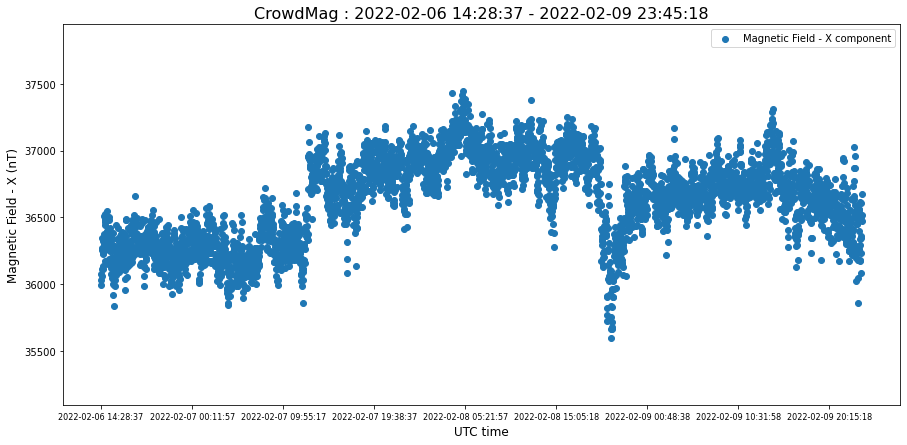

In [3]:
cm.PlotBCrowdMag(pathCM + filenameCM,
                 fieldtype=fieldtype,
                 startCM=startCM,endCM=endCM)

## Download relevant GeoMag data

1. Download the GeoMag data using the CrowdMag .csv file. The program takes the start and end times, the observatory code, the component of the magnetic field and downloads a .csv file into the folder \data\geomag.

In [4]:
gm.DownloadGeoMag(pathCM + filenameCM,
                 startCM=startCM,endCM=endCM)

Download URL: https://geomag.usgs.gov/ws/data/?elements=H&endtime=2022-02-09T23:45:18.000Z&format=iaga2002&id=BRW&sampling_period=60&starttime=2022-02-06T14:28:37.000Z&type=adjusted
Downloaded file successfully. Observatory: BRW, B-field component: H, Start date: 2022-02-06, End date: 2022-02-09.
Geomag data file location: 'C:\Users\JB\Documents\GitHub\NOAA_CrowdMag\magneto\data\geomag'.


2. The format of the GeoMag data filename: 
> geomag, observatory code, component of magnetic field, start date, end date <br>
> geomag{OBSCODE}{COMPONENT}_YYYY-MM-DD_YYYY-MM-DD.csv <br>
> For example: geomagBRWH_2021-12-17_2021-12-19.csv <br>

## Plot GeoMag data

1. Change the `start` and `end` variables to zoom into the plot. The numbers represent rows in the .csv file.
2. The observatory code, fieldtype, download boolean is defined in the first cells of the notebook. 
3. The filename should be the CrowdMag .csv because it uses the times to download the GeoMag data.

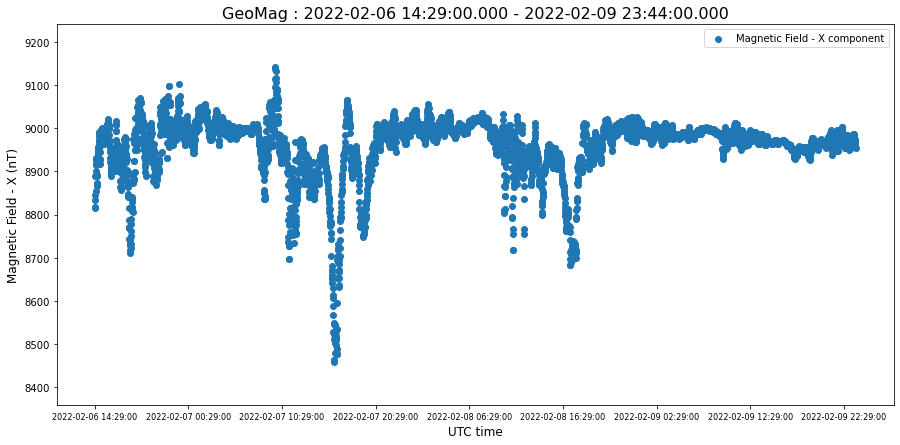

In [5]:
gm.PlotBGeoMag(pathCM + filenameCM,
               observatory=observatory,
               fieldtype=fieldtype,
               startCM=startCM,endCM=endCM,startGM=0,endGM=-1,
               download=download)

## Overay two data sets 

1. Overlaying the CrowdMag and the GeoMag data.
2. The CrowdMag data is scaled such that its magnitude is similar to the GeoMag data. The scaling factor was calculated by 
> Scale = Mean(GeoMag magnetic field) / Mean(CrowdMag magnetic field)

Timeshift when GM > CM: 23.0


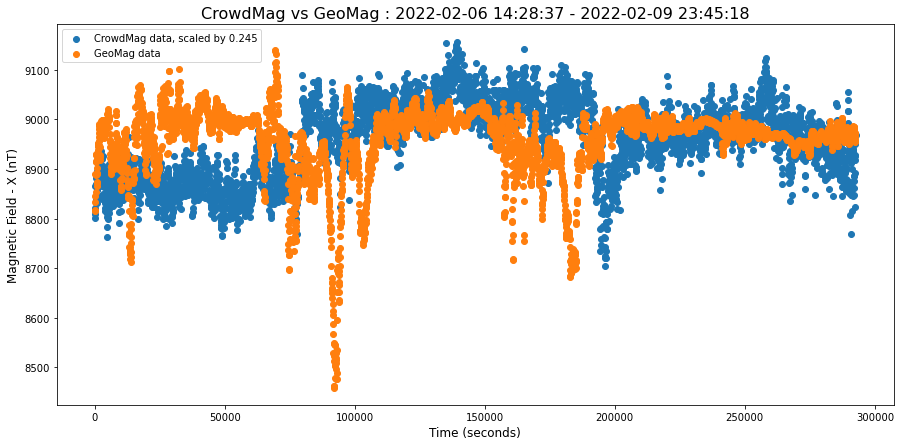

In [6]:
cor.PlotOverlay2Data(pathCM + filenameCM,
                          observatory=observatory,
                          fieldtype=fieldtype,
                          startCM=startCM,endCM=endCM,startGM=0,endGM=-1,
                          download=download)

## Scatter Plot and Fitting

1. In order to create a scatter plot with the two data sets, the number of data points need to be the same.
2. A 1-D interpolating spline is created for both the CrowdMag and the GeoMag data points, using a scipy library: 
> https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.InterpolatedUnivariateSpline.html
3. Using the now continuous function, new data points is defined for both data sets. 
4. A linear fit ( ax + b ) is created to fit the data points.
5. The correlation coefficient, and the reduced chi-squared is calculated. 

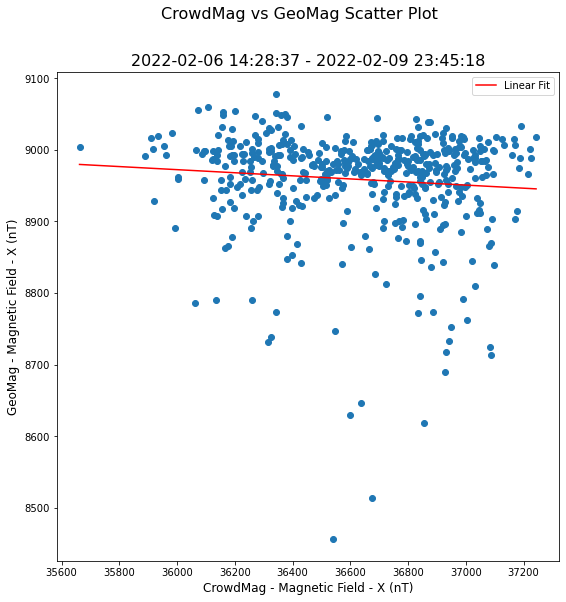

Correlation coefficient of the two datasets is -0.09.
Slope = -0.021557595478925235
Intercept = 9748.278794653206
Chi-squared = 303.4134097752026
Reduced chi-squared = 0.07260430958966321


In [7]:
cor.ScatterPlot(pathCM + filenameCM,
                observatory=observatory,
                fieldtype=fieldtype,
                startCM=startCM,endCM=endCM,startGM=0,endGM=-1,
                download=download)